In [1]:
from ur5_spatialvae import *
matplotlib.use('TkAgg')
%matplotlib inline

In [9]:
device = 'cuda'
svae_model = svae.CustomDeepSpatialAutoencoder(in_channels=3,
                                               hidden_dims=[32, 64, 128],
                                               latent_dimension=390,
                                               latent_height=12,
                                               latent_width=12,
                                               out_channels=3
                                              ).to(device)

In [30]:
train_dataset = UR5Dataset(data_dir='/home/gun/ssd/disk/ur5_tidying_data/3block')
test_dataset = UR5Dataset(data_dir='/home/gun/ssd/disk/ur5_tidying_data/3block_test')

colors = np.array([
    [1., 0., 0.],
    [0., 0.6, 0.],
    [0., 0., 1.]
])

load 0-th npy file.
load 0-th npy file.


In [26]:
model_path = 'temp/NoAug2_0ep.pth'
svae_model.load_state_dict(torch.load(model_path))
_ = svae_model.eval()

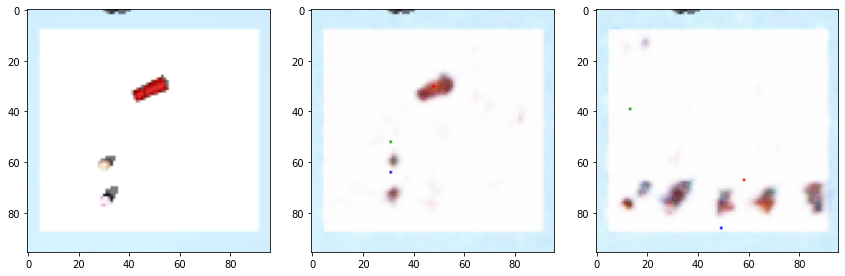

In [40]:
# Evaulate with Train data #
images, _depths, poses = train_dataset.__getitem__(0)
images = images.reshape(1, *images.shape)
poses = poses.reshape(1, *poses.shape)

images = images.to(device)

spatial_features, poses_norm = svae_model.encoder(images, poses)
recon = svae_model.decoder(spatial_features, poses_norm.to(device), normalise=False)
img_recon = recon.detach().cpu().numpy()[0].transpose([1,2,0])
for c, p in zip(colors, poses_norm[0]):
    x, y = p
    xp = int((x+1)*95/2)
    yp = int((y+1)*95/2)
    img_recon[yp, xp] = c

poses_sample = torch.rand(poses_norm.shape) * 2 - 1
recon_sample = svae_model.decoder(spatial_features, poses_sample.to(device), normalise=False)
img_recon_sample = recon_sample.detach().cpu().numpy()[0].transpose([1,2,0])
for c, p in zip(colors, poses_sample[0]):
    x, y = p
    xp = int((x+1)*95/2)
    yp = int((y+1)*95/2)
    img_recon_sample[yp, xp] = c

f, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
ax[0].imshow(images.detach().cpu().numpy()[0].transpose([1,2,0]))
ax[1].imshow(img_recon)
ax[2].imshow(img_recon_sample)
plt.show()

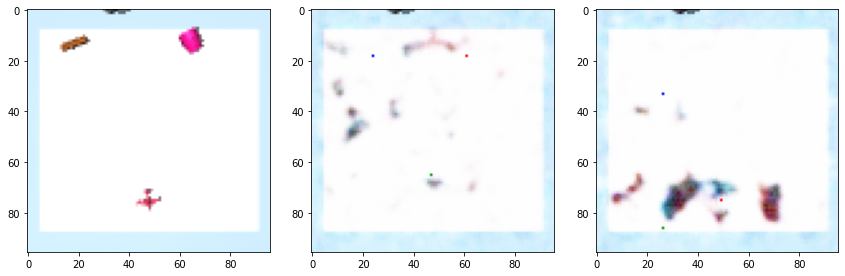

In [41]:
# Evaulate with Test data #
images, _depths, poses = test_dataset.__getitem__(0)
images = images.reshape(1, *images.shape)
poses = poses.reshape(1, *poses.shape)

images = images.to(device)

spatial_features, poses_norm = svae_model.encoder(images, poses)
recon = svae_model.decoder(spatial_features, poses_norm.to(device), normalise=False)
img_recon = recon.detach().cpu().numpy()[0].transpose([1,2,0])
for c, p in zip(colors, poses_norm[0]):
    x, y = p
    xp = int((x+1)*95/2)
    yp = int((y+1)*95/2)
    img_recon[yp, xp] = c

poses_sample = torch.rand(poses_norm.shape) * 2 - 1
recon_sample = svae_model.decoder(spatial_features, poses_sample.to(device), normalise=False)
img_recon_sample = recon_sample.detach().cpu().numpy()[0].transpose([1,2,0])
for c, p in zip(colors, poses_sample[0]):
    x, y = p
    xp = int((x+1)*95/2)
    yp = int((y+1)*95/2)
    img_recon_sample[yp, xp] = c

f, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.tight_layout()
ax[0].imshow(images.detach().cpu().numpy()[0].transpose([1,2,0]))
ax[1].imshow(img_recon)
ax[2].imshow(img_recon_sample)
plt.show()